In [18]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, LassoCV, ElasticNet, ElasticNetCV, Ridge, RidgeCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from time import perf_counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
import lightgbm as lgb
from mlxtend.regressor import StackingCVRegressor
from sklearn import metrics
from IPython.display import Markdown, display

def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))

import warnings
warnings.filterwarnings(action='ignore')

"""# 1. Data Analysis & Data Processing<a class="anchor" id="1"></a><a class="anchor" id="1"></a>"""

import pandas as pd
df = pd.read_csv('C:\\Users\\thinkpad\\Desktop\\Python\\caltech week4 updated\\project\\kc_house_data.csv')
# df = pd.read_csv('../input/housesalesprediction/kc_house_data.csv', index_col = 0)
df.head()

df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


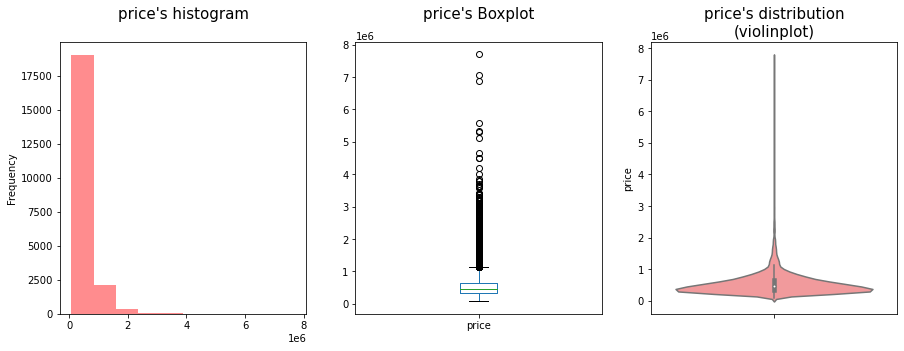

### Number of rows in the dataset: 21613

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,60
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,24
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,50
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,28


In [19]:
# df = df[df['price'] < 1000000]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

df['price'].plot.hist(by='price',ax = axes[0], color = '#ff8c8e')
axes[0].set_title('price\'s histogram\n', fontsize = 15)

df['price'].plot.box(ax = axes[1])
axes[1].set_title('price\'s Boxplot\n', fontsize = 15)

sns.violinplot(ax = axes[2], y = 'price', data = df, color = '#ff8c8e')
axes[2].set_title('price\'s distribution\n(violinplot)', fontsize = 15)

plt.show()

printmd(f'### Number of rows in the dataset: {df.shape[0]}')

"""### Add a column to the DataFrame: age
The data are from the year 2014 and 2015. We'll take 2015 to simplify the calculation.The age is whether the number of years since the house was built or if it has been
renovated, the number of years since the renovation.
"""

# Add the column age
df['age'] = [2015 - x[0] if x[1]==0 else 2015 - x[1] for x in df[['yr_built','yr_renovated']].values]

# Display the result
df[['yr_built','yr_renovated','age']].head()

# Select some columns, which will be used in the regression model
cols =['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',
     'waterfront','view','condition','grade','sqft_above','sqft_basement',
     'yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15','age']
df = df[cols]
df.head()


Delete number is: 420
Now column number is: 21193
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: price, dtype: float64
Description of data larger than the upper bound is:
count    4.200000e+02
mean     2.254861e+06
std      7.645877e+05
min      1.615000e+06
25%      1.761500e+06
50%      1.988250e+06
75%      2.476000e+06
max      7.700000e+06
Name: price, dtype: float64
Delete number is: 20
Now column number is: 21173
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: bedrooms, dtype: float64
Description of data larger than the upper bound is:
count    20.000000
mean     10.000000
std       5.486826
min       8.000000
25%       8.000000
50%       9.000000
75%       9.250000
max      33.000000
Name: bedrooms, dtype: float64
Delete number is: 5
Now column number is: 2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age
count,1.689100e+04,16891.00000,16891.000000,16891.000000,16891.000000,16891.00000,16891.0,16891.0,16891.000000,16891.000000,16891.000000,16891.000000,16891.000000,16891.0,16891.000000,16891.000000,16891.000000,16891.000000,16891.000000
mean,4.653516e+05,3.31058,2.021816,1900.519093,7421.708661,1.48437,0.0,0.0,3.410159,7.472559,1660.545320,239.973773,1971.976911,0.0,47.559769,-122.222258,1858.297733,7200.688118,43.023089
std,2.246777e+05,0.86675,0.700824,727.001614,3918.250626,0.54555,0.0,0.0,0.651383,1.001303,698.150914,376.668462,29.493632,0.0,0.139402,0.131088,584.232602,3349.243603,29.493632
min,7.800000e+04,0.00000,0.000000,370.000000,520.000000,1.00000,0.0,0.0,1.000000,4.000000,370.000000,0.000000,1900.000000,0.0,47.155900,-122.490000,460.000000,651.000000,0.000000
25%,3.030000e+05,3.00000,1.500000,1360.000000,4815.500000,1.00000,0.0,0.0,3.000000,7.000000,1150.000000,0.000000,1952.000000,0.0,47.468300,-122.330000,1440.000000,4950.000000,16.000000
50%,4.180000e+05,3.00000,2.000000,1790.000000,7200.000000,1.00000,0.0,0.0,3.000000,7.000000,1470.000000,0.000000,1975.000000,0.0,47.570600,-122.244000,1740.000000,7241.000000,40.000000
75%,5.737500e+05,4.00000,2.500000,2330.000000,9332.000000,2.00000,0.0,0.0,4.000000,8.000000,2030.000000,460.000000,1999.000000,0.0,47.681000,-122.145000,2180.000000,8993.500000,63.000000
max,1.610000e+06,7.00000,5.250000,5720.000000,26772.000000,3.50000,0.0,0.0,5.000000,11.000000,4670.000000,1870.000000,2015.000000,0.0,47.777600,-121.646000,4440.000000,21315.000000,115.000000


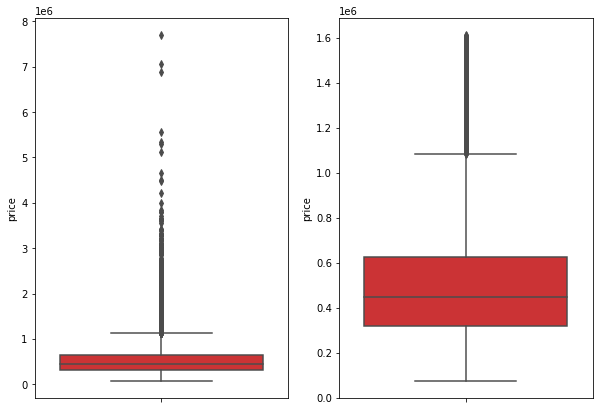

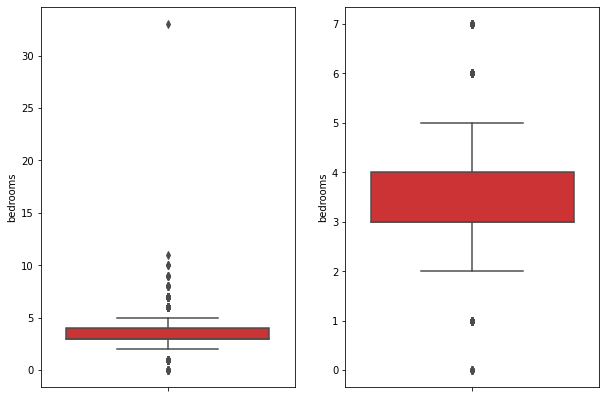

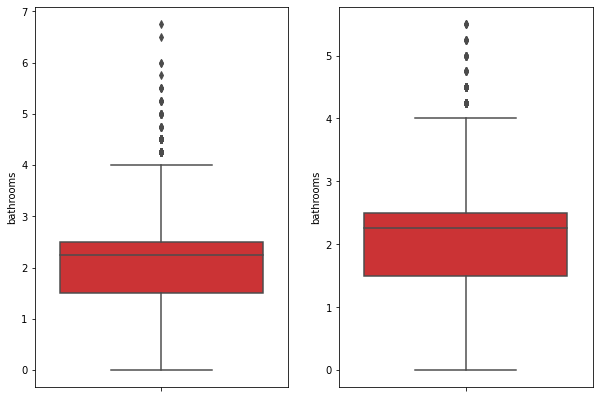

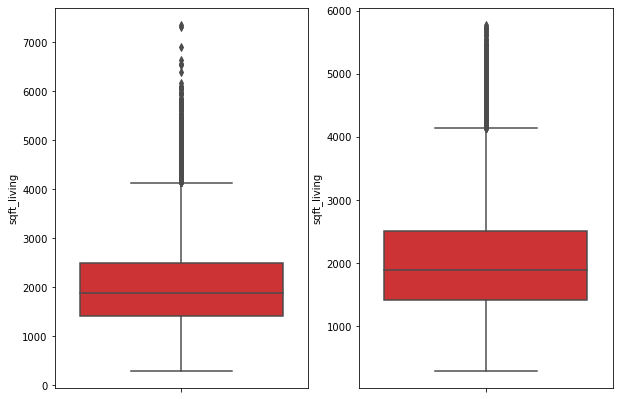

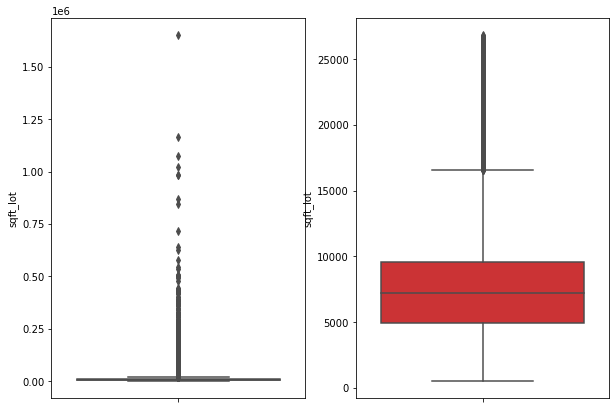

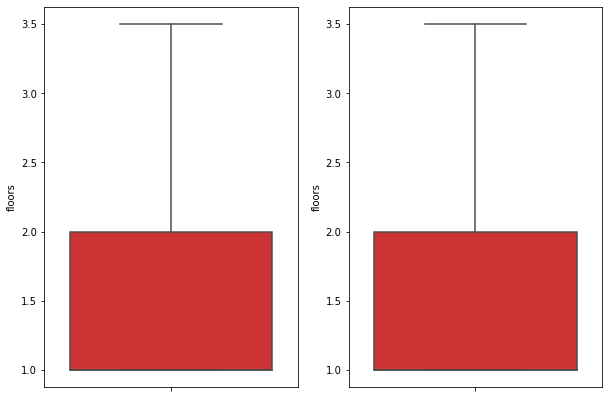

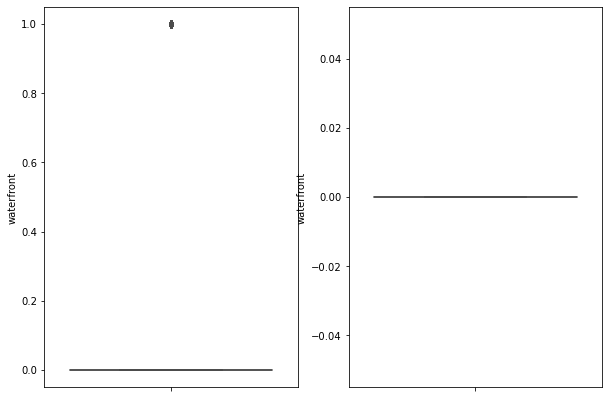

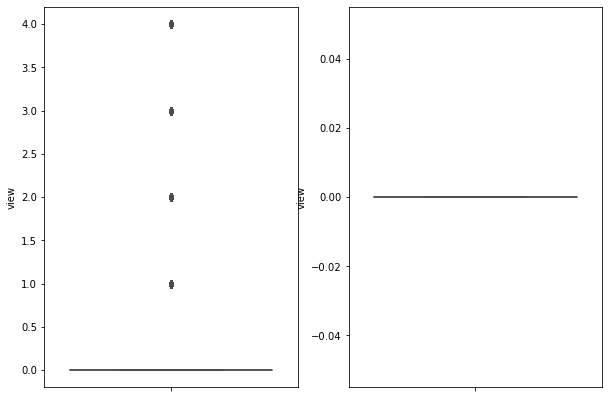

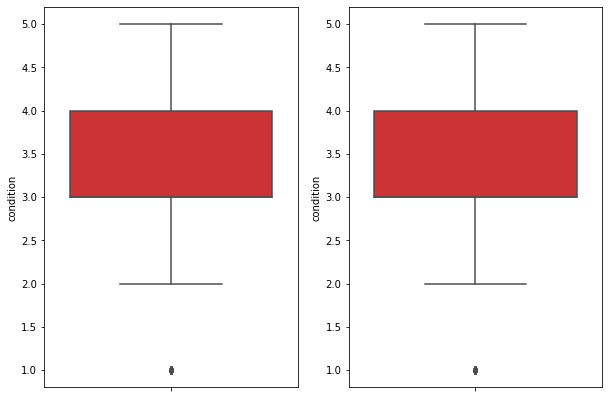

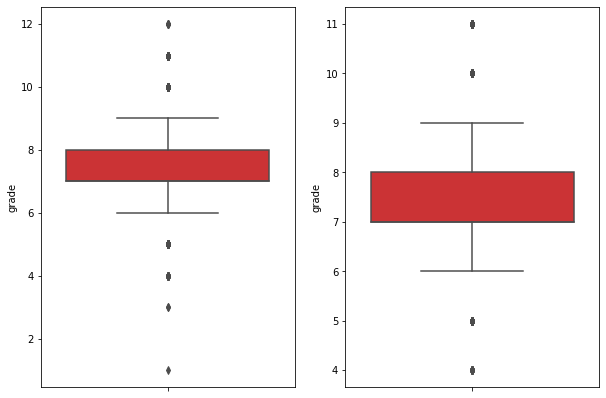

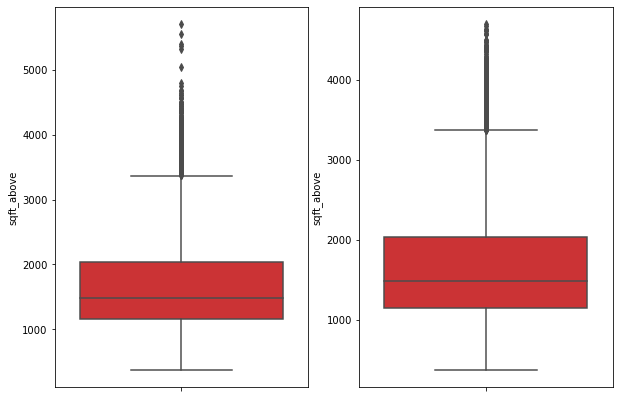

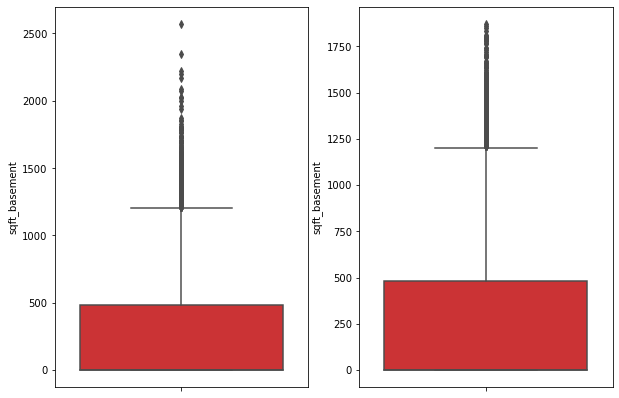

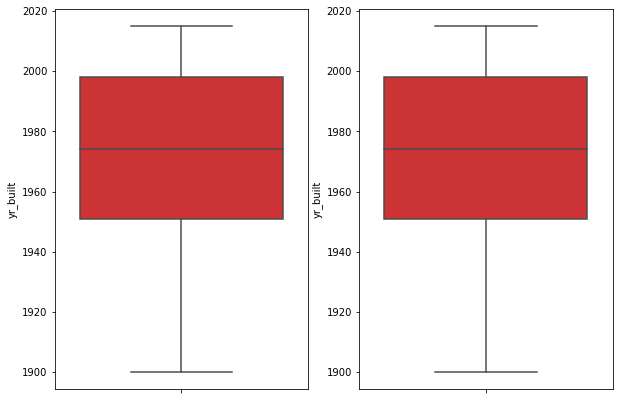

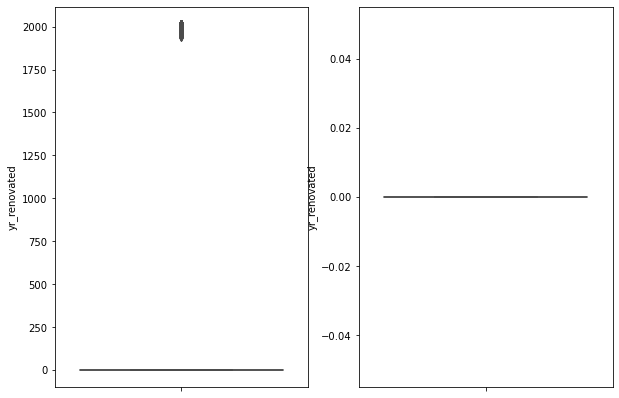

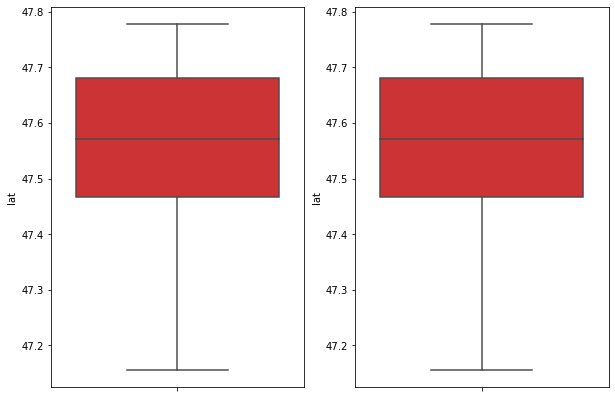

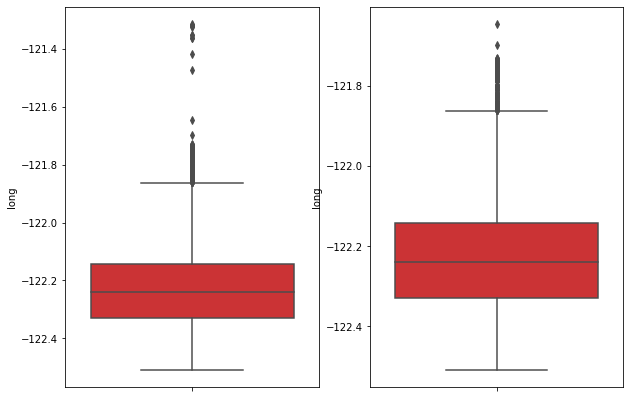

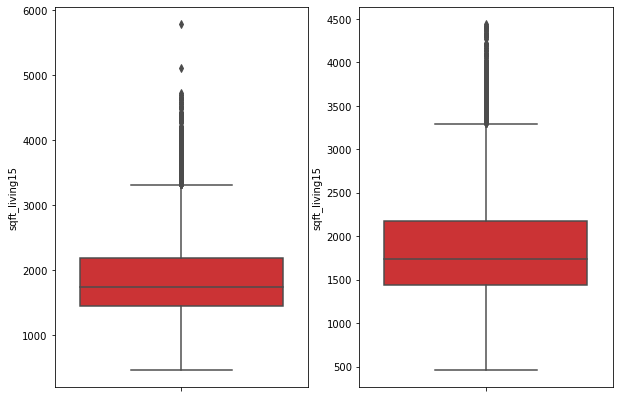

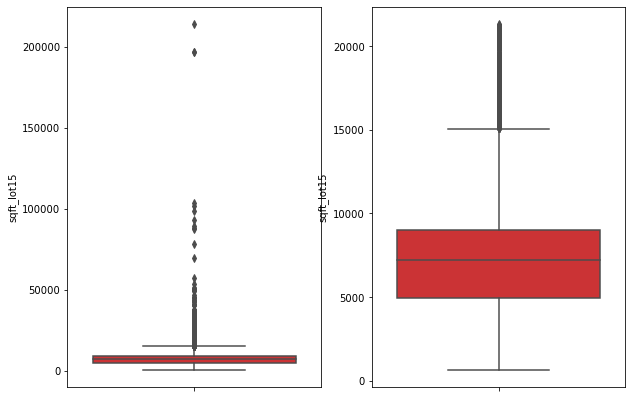

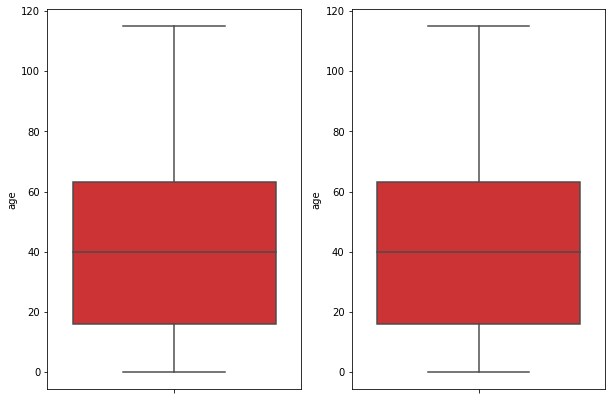

In [20]:
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

for i in df.columns.values.tolist():
    if str(df[i]) != 'int64':
        df[i] = df[i].apply(pd.to_numeric)
        df = outliers_proc(df,i)
    else:
        df = outliers_proc(df,i)

df.info()
df.describe()


[[ 3.11722951  1.39511783  1.36354481 ...  0.55193697 -1.41094618
   2.24457871]
 [-0.35372271 -0.03073412 -0.45254135 ... -0.4913387  -0.58121666
  -0.87803731]
 [ 0.80326137  0.32572887  0.42798527 ...  0.80848016  0.48702293
  -0.43679809]
 ...
 [-1.51070678 -1.45658607 -1.27803506 ... -0.98732221 -0.28382256
   1.05662696]
 [-0.35372271  0.32572887  0.41422705 ...  0.58614273  0.83200008
  -0.53862253]
 [ 0.80326137  1.39511783  0.85449036 ...  1.116332   -0.65110427
  -1.01380323]]
(13512, 18)
[[ 0.8473161   0.25148068  4.10127769 ...  0.01446869 -0.28606694
  -0.8130026 ]
 [-0.16556983 -1.22107142 -1.5364141  ...  0.26960736  0.64587488
   0.31340019]
 [ 2.39334082  0.01757007 -0.31231634 ... -0.87912246 -0.16807212
  -0.49553773]
 ...
 [-3.42243707  0.10029149 -1.34500917 ...  0.27414043  0.08960378
   0.29009458]
 [ 1.64934137 -0.17265399 -1.54252769 ... -0.07224204 -0.18580758
  -0.11831709]
 [ 3.07490742 -1.07367205 -0.65845645 ...  0.75197992  0.08183605
  -0.06765873]]
(135

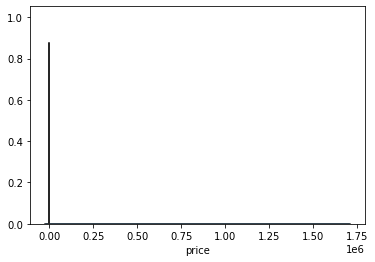

In [21]:
def preprocessing(df):
    df = df.copy()
       
    # Shuffle the data
    # df = df.sample(frac=1.0, random_state=0).reset_index(drop=True)
    
    X = df.drop('price', axis=1)
    y = df['price']
    
    X = pd.DataFrame(X, index=X.index, columns=X.columns)
    
    return X, y

# Preprocessing
X,y = preprocessing(df)

# Split into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the datasets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the result
print(X_train)
print(X_train.shape)

# PCA
pca = PCA(n_components=0.98)
pca.fit(X_train)
X_train_dunction = pca.transform(X_train)
X_test_dunction = pca.transform(X_test)

print(X_train_dunction)
print(X_train_dunction.shape)

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

print(X_train_lda)
print(X_train_lda.shape)

#因为由前文可知，目标值明显右偏，故取对数，使其近似正态分布

sns.distplot(y_train, fit=norm)
print('Skewness of target:', y_train.skew())
print('kurtosis of target:', y_train.kurtosis())

y_train = np.log1p(y_train)
print('Skewness of target:', y_train.skew())
print('kurtosis of target:', y_train.kurtosis())
sns.distplot(y_train, fit=norm)

train= np.column_stack((X_train,y_train))
test= np.column_stack((X_test,y_test))
train = pd.DataFrame(train)
test = pd.DataFrame(test)
train.head()
p = train[11]


In [25]:
params = {    'boosting_type': 'gbdt', 
    'objective': 'regression', 
 
    'learning_rate': 0.1, 
    'num_leaves': 50, 
    'max_depth': 6,    'subsample': 0.8, 
    'colsample_bytree': 0.8, 
    }
data_train = lgb.Dataset(X_train, y_train, silent=True)
cv_results = lgb.cv(
    params, data_train, num_boost_round=1000, nfold=5, stratified=False, shuffle=True, metrics='rmse',
    early_stopping_rounds=50, verbose_eval=50, show_stdv=True, seed=0)
 
print('best n_estimators:', len(cv_results['rmse-mean']))
print('best cv score:', cv_results['rmse-mean'][-1])

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000930 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2237
[LightGBM] [Info] Number of data points in the train set: 10808, number of used features: 15
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000840 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2237
[LightGBM] [Info] Number of data points in the train set: 10808, number of used features: 15
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000855 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2237
[LightGBM] [Info] Number of data points in the train set: 10808, number of used features: 15
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001144 seconds.
You can set `forc

In [36]:
from sklearn.model_selection import GridSearchCV
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=50,
                              learning_rate=0.1, n_estimators=207, max_depth=6,
                              metric='rmse', bagging_fraction = 0.8,feature_fraction = 0.8)
 

params_test1={    'max_depth': range(3,8,2),    'num_leaves':range(50, 170, 30)
}
gsearch1 = GridSearchCV(estimator=model_lgb, param_grid=params_test1, scoring='neg_mean_squared_error', cv=5)
gsearch1.fit(X_train, y_train)
gsearch1.best_params_


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fractio

{'max_depth': 7, 'num_leaves': 50}

In [38]:
params_test2={    'max_depth': [6,7,8],    'num_leaves':[38,44,50,56,62]
}
gsearch2 = GridSearchCV(estimator=model_lgb, param_grid=params_test2, scoring='neg_mean_squared_error', cv=5)
gsearch2.fit(X_train, y_train)
gsearch2.best_params_
#可见最大深度7是没问题的，但是看细节的话，发现在最大深度为7的情况下，叶结点的数量对分数并没有影响。

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fractio

{'max_depth': 7, 'num_leaves': 44}

In [39]:
params_test3={    'min_child_samples': [18, 19, 20, 21, 22],    'min_child_weight':[0.001, 0.002]
}
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=44,
                              learning_rate=0.1, n_estimators=207, max_depth=7, 
                              metric='rmse', bagging_fraction = 0.8, feature_fraction = 0.8)
gsearch3 = GridSearchCV(estimator=model_lgb, param_grid=params_test3, scoring='neg_mean_squared_error', cv=5)
gsearch3.fit(X_train, y_train)
gsearch3.best_params_

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fractio

{'min_child_samples': 21, 'min_child_weight': 0.001}

In [40]:
params_test4={    'feature_fraction': [0.5, 0.6, 0.7, 0.8, 0.9],    'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 1.0]
}
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=44,
                              learning_rate=0.1, n_estimators=207, max_depth=7, 
                              metric='rmse', bagging_freq = 5,  min_child_samples=21)
gsearch4 = GridSearchCV(estimator=model_lgb, param_grid=params_test4, scoring='neg_mean_squared_error', cv=5)
gsearch4.fit(X_train, y_train)
gsearch4.best_params_

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 

{'bagging_fraction': 1.0, 'feature_fraction': 0.8}

In [43]:
params_test5={    'reg_alpha': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5],    'reg_lambda': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5]
}
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=44,
                              learning_rate=0.1, n_estimators=207, max_depth=7, 
                              metric='rmse',  min_child_samples=21, feature_fraction=0.8)
gsearch5 = GridSearchCV(estimator=model_lgb, param_grid=params_test5, scoring='neg_mean_squared_error', cv=5)
gsearch5.fit(X_train, y_train)
gsearch5.best_params_

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGB

{'reg_alpha': 0.5, 'reg_lambda': 0.3}

In [56]:
lgbr_params = {'learning_rate': 0.1,
      'n_estimators': 207, 
      'max_depth': 7,
      'num_leaves': 44,
      'subsample': 0.6,
      'feature_fraction':0.7,        
      'colsample_bytree': 0.6,
      'min_child_weight': 0.001,
      'min_child_samples': 21,
      'random_state': 42,
      'bagging_fraction': 1.0,
      'reg_alpha': 0.5,
      'reg_lambda': 0.3}
lgbr = lgb.LGBMRegressor(**lgbr_params)
models = {"LightGBM":{"model":lgbr }}
k = 5
for name, m in models.items():
    # Cross validation of the model
    model = m['model']
    result = cross_validate(model, X_train,y_train, cv = k, scoring='neg_mean_squared_error')
    
    # Mean accuracy and mean training time
    result['test_score'] = result['test_score']
    mean_RMSE = [(-x)**0.5 for x in result['test_score']] # Root Mean Square Error
    mean_RMSE = sum(mean_RMSE)/len(mean_RMSE)
    # mean_RMSE = int(mean_RMSE)
    mean_fit_time = round( sum(result['fit_time']) / len(result['fit_time']), 4)
    
    # Add the result to the dictionary witht he models
    m['mean_RMSE'] = mean_RMSE
    m['Training time (sec)'] = mean_fit_time
    
    # Display the result
    print(f"{name:27} mean MSRE for {k}-fold CV: {mean_RMSE} - mean training time {mean_fit_time} sec")


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=0.6 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=0.6 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=0.6 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=0.6 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fractio